# Introduction to Pandas 

Tonight we're going to be starting our journey through the Pandas library (created by [Wes McKinney](http://wesmckinney.com/)). When we refer to working in Pandas, we're typically working with an object known as a pandas dataframe. Dataframes are nice in that they bring us back to a feeling similar to an excel environment, which allows us to feel comfortable based on the row-column nature of our data.  Pandas is like excel, but a million times better for reasons we will support throughout this lecture. 

Since a Pandas DataFrame is an **object**, it will have methods and attributes. We will take a look at some of the most popular methods and attributes for this type of object.  A quick view of this libary is provided [here](http://pandas.pydata.org/pandas-docs/stable/10min.html).

The standard import for the pandas library is as shown below. 

```python
import pandas as pd 
```


## Getting a DataFrame Object

There are two basic ways that we might create a Pandas DataFrame object. The first means of creating this object is internal to python using the `DataFrame` constructor. The second means of creating this object is by reading in external data.  To see all of the options regarding the types of data we might read into our DataFrame type `pd.read_` then hit `tab`.  For further information on Pandas Dataframes, we can look further into the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

##### Using data already in our Python program

###### Method 1

If we are using data that is already in our Python program, then we will be passing our data to the `DataFrame` constructor. There are two ways of passing data within python.  Either we pass a list of dictionaries, or we pass two lists: one for the values and the second for the columns.  We will illustrate each of these methods below, so you have the opportunity to see how each works. 

In [2]:
import pandas as pd 
lst = [{'a': 1, 'b': 2, 'c':3}, {'a': 4, 'b':5, 'c':6, 'd':7}]
df = pd.DataFrame(lst)
df

,a,b,c,d
0,1,2,3,NaN
1,4,5,6,7.0


All Pandas DataFrames will consist of **rows** and **columns**.  We can access the rows via index, and we can access columns via the column names.  In the above example we have the columns `a`, `b`, `c`, and `d`. Notice the rows of our dataframe have the indices `0` and `1`. These column names and indices are how we will access data. 

When the Pandas DataFrame constructor encounters a list of dictionaries, the keys are read as the column names and the values as the values for each column. By default, the DataFrame constructor will assign a column for **every** key that it sees in **any** dictionary in the list of dictionaries. If a particular dictionary in that list doesn't have a value for that key, then it assigns a `NaN` (stands for not a number) value for that index-column pair. 

Using this idea, what do you expect for the output of the following?

In [5]:
data_lst = [{'a': 1}, {'b':5}, {'c': 4}]
df = pd.DataFrame(data_lst)
df

,a,b,c
0,1.0,NaN,NaN
1,NaN,5.0,NaN
2,NaN,NaN,4.0


###### Method 2

The second method for creating a dataframe internal to python is to create a list of lists as values, and a list of strings as a column names.  The constructor will read each internal list in the `data` argument as a row.

In [6]:
data_vals = [[1, 2, 3], [4, 5, 6]]
data_cols = ['a', 'b', 'c']
df = pd.DataFrame(data=data_vals, columns=data_cols)
df

,a,b,c
0,1,2,3
1,4,5,6


Using lists is not as flexible as using a list of dictionaries.  The following will not work due to dimension constraints.

In [7]:
data_vals = [[1, 2], [4, 5, 6]]
data_cols = ['a', 'b']
df = pd.DataFrame(data=data_vals, columns=data_cols)

AssertionError: 2 columns passed, passed data had 3 columns

Although the following command will work, we have less control over our `NaN` value. 

In [8]:
data_vals = [[1, 2], [4, 5, 6]]
data_cols = ['a', 'b', 'c']
df = pd.DataFrame(data=data_vals, columns=data_cols)
df

,a,b,c
0,1,2,NaN
1,4,5,6.0


#### Pandas for External Data

There are many ways that we can read external data into a Pandas DataFrame.

The [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) provides additional information.  We have easy access to the numerous file types using pandas (CSV, JSON, SQL, Excel, HTML). All of these take some form of `pd.read_{data_type}`.

If we wanted to load data in from a CSV, we would simply use:

```python
df = pd.read_csv('path_to_my_data/my_data.csv')
```

The above assumes that we have the column names in the first row of our `.csv` file.  If our file did not have column headings, we could read in our data in the following way:

```python
df = pd.read_csv('my_data.csv', header=None)
```

We could also remane our columns upon reading in our data using the `names` argument:

```python
df = pd.read_csv('my_data.csv', header=None, names=['col1', 'col2', ...., 'col12'])
```

## Usual First Commands

Many datasets exist on the uci website.  For this particular notebook, download the wine data from [here](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/).

Frequently, I will run the following commands to get a better understanding of my data, and also to assure my data has been read in correctly:

In [10]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [11]:
df.shape # rows, columns

(1599, 12)

In [12]:
df.columns 

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df.tail() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### Beyond the Initial Look

With the above, we can build a strong foundation for the key characteristics of our data.  However, we might have specific questions regarding our data that we are not able to answer with these umbrella commands.

Below we will showcase a number of ways to obtain more specific information regarding our dataframe.

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df['chlorides'] # grab column chlorides
df.chlorides # same 

0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
5       0.075
6       0.069
7       0.065
8       0.073
9       0.071
10      0.097
11      0.071
12      0.089
13      0.114
14      0.176
15      0.170
16      0.092
17      0.368
18      0.086
19      0.341
20      0.077
21      0.082
22      0.106
23      0.084
24      0.085
25      0.080
26      0.080
27      0.106
28      0.080
29      0.082
        ...  
1569    0.056
1570    0.230
1571    0.038
1572    0.069
1573    0.075
1574    0.074
1575    0.060
1576    0.081
1577    0.076
1578    0.118
1579    0.053
1580    0.068
1581    0.053
1582    0.053
1583    0.074
1584    0.061
1585    0.066
1586    0.065
1587    0.066
1588    0.068
1589    0.073
1590    0.077
1591    0.089
1592    0.076
1593    0.068
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, dtype: float64

In [19]:
df['volatile acidity']
df.volatile acidity # why we do not use spaces in our column names

SyntaxError: invalid syntax (<ipython-input-19-1b8601a0d2a8>, line 2)

Below is one method to replace spaces in our column headings.

In [20]:
df2 = df.copy()
cols = df2.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df2.columns = cols
df2.volatile_acidity

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
5       0.660
6       0.600
7       0.650
8       0.580
9       0.500
10      0.580
11      0.500
12      0.615
13      0.610
14      0.620
15      0.620
16      0.280
17      0.560
18      0.590
19      0.320
20      0.220
21      0.390
22      0.430
23      0.490
24      0.400
25      0.390
26      0.410
27      0.430
28      0.710
29      0.645
        ...  
1569    0.510
1570    0.360
1571    0.380
1572    0.690
1573    0.580
1574    0.310
1575    0.520
1576    0.300
1577    0.700
1578    0.670
1579    0.560
1580    0.350
1581    0.560
1582    0.715
1583    0.460
1584    0.320
1585    0.390
1586    0.310
1587    0.610
1588    0.660
1589    0.725
1590    0.550
1591    0.740
1592    0.510
1593    0.620
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile_acidity, dtype: float64

We can subset our data in a number of different ways.  See the below methods - notice which commands work and which break.  

In [21]:
df2[['chlorides', 'volatile_acidity']]

,chlorides,volatile_acidity
0,0.076,0.700
1,0.098,0.880
2,0.092,0.760
3,0.075,0.280
4,0.076,0.700
5,0.075,0.660
6,0.069,0.600
7,0.065,0.650
8,0.073,0.580
9,0.071,0.500


In [22]:
df2[:3] 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [23]:
df2[:1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df2[0]

KeyError: 0

In [25]:
df[:1, 'volatile acidity'] 

TypeError: unhashable type

There are three **methods** that we can use to index into a Pandas DataFrame: `loc[]`, `iloc[]`, and `ix[]` (as well as `at` and `iat`, which I have never used).  Note the differences between these three methods: `loc[]` is based on the names of our indices or columns, `iloc[]` is based on the numeric counts of our rows or columns, and `ix[]` first looks to the label, but then looks to integer indexing.

Because `ix[]` is more flexible than `loc[]` and `iloc[]`, I prefer this method.

Let's take a closer look at how these work.

In [26]:
df.loc[0, 'fixed acidity'] 

7.4000000000000004

In [29]:
df.loc[0:10, 'fixed acidity']

0      7.4
1      7.8
2      7.8
3     11.2
4      7.4
5      7.4
6      7.9
7      7.3
8      7.8
9      7.5
10     6.7
Name: fixed acidity, dtype: float64

In [32]:
a = df.loc[0:10, 'fixed acidity']
type(a)

pandas.core.series.Series

In [28]:
df.loc[10:15, ['chlorides', 'fixed acidity']]

,chlorides,fixed acidity
10,0.097,6.7
11,0.071,7.5
12,0.089,5.6
13,0.114,7.8
14,0.176,8.9
15,0.170,8.9


In [33]:
df.iloc[0, 0]

7.4000000000000004

In [34]:
df.iloc[0:10, 0]

0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
5     7.4
6     7.9
7     7.3
8     7.8
9     7.5
Name: fixed acidity, dtype: float64

In [35]:
df.iloc[10:15, [0, 4]]

,fixed acidity,chlorides
10,6.7,0.097
11,7.5,0.071
12,5.6,0.089
13,7.8,0.114
14,8.9,0.176


In [36]:
df.ix[0, 'fixed acidity']

7.4000000000000004

In [37]:
df.ix[0:10, 'fixed acidity'] 

0      7.4
1      7.8
2      7.8
3     11.2
4      7.4
5      7.4
6      7.9
7      7.3
8      7.8
9      7.5
10     6.7
Name: fixed acidity, dtype: float64

In [38]:
df.ix[10:15, ['chlorides', 'fixed acidity']]

,chlorides,fixed acidity
10,0.097,6.7
11,0.071,7.5
12,0.089,5.6
13,0.114,7.8
14,0.176,8.9
15,0.170,8.9


In [39]:
df.ix[0, 0]

7.4000000000000004

In [40]:
df.ix[0:10, 0]

0      7.4
1      7.8
2      7.8
3     11.2
4      7.4
5      7.4
6      7.9
7      7.3
8      7.8
9      7.5
10     6.7
Name: fixed acidity, dtype: float64

In [41]:
df.ix[10:15, [0, 4]]

,fixed acidity,chlorides
10,6.7,0.097
11,7.5,0.071
12,5.6,0.089
13,7.8,0.114
14,8.9,0.176
15,8.9,0.170


There are two additional ways we might go about subsetting our data.  The first method is known as masking, and the second uses a method on our DataFrames known as `query()`.  The below command says - provide the rows of `df` where the chlorides column is less than or equal to 0.08.

In [45]:
len(df[df['chlorides'] <= 0.08])

874

We can also mask based on more than one category.  In the final command here, I show my preferred method of taking a subset of data, the `query` method.

In [44]:
len(df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)])

799

In [46]:
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08) & (df['pH'] > 3.5) & (df['pH'] < 4.00)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.100000,4
94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.500000,4
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.900000,6
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.000000,5
132,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.000000,5
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6


In [47]:
df.query('chlorides >= 0.04 and chlorides <= 0.08 and pH > 3.5 and pH < 4.00')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.100000,4
94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.500000,4
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.900000,6
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.000000,5
132,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.000000,5
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6


The creator of Pandas wrote [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), which is a very practical guide to using pandas and numpy in practice.

Pandas is a nice blend between the commands available from a SQL environment as well as an R environment.  One of my favorite additions to the pandas dataframe is that of the `groupby` method.  In general we need to specify what we would like to group by, and then we need to specify our aggregate on our `groupby object`.  Consider for this example that we want to groupby quality.  

Notice, the object that is returned is also a dataframe, so we can perform additional dataframe methods on this object.  Let's look at a few commands in practice.

In [48]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [49]:
df.groupby('quality') 

In [50]:
df.groupby('quality').mean()
df.groupby('quality').max()
df.groupby('quality').std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.122020,0.818009
4,1.626624,0.220110,0.201030,1.789436,0.076192,9.025926,27.583374,0.001575,0.181441,0.239391,0.934776
5,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521
6,1.797849,0.160962,0.195108,1.441576,0.039563,9.940911,25.038250,0.002000,0.153995,0.158650,1.049639
7,1.992483,0.145224,0.194432,1.371509,0.029456,10.175255,33.191206,0.002176,0.150101,0.135639,0.961933
8,2.119656,0.144914,0.199526,1.295038,0.011678,11.155613,25.433240,0.002378,0.200640,0.115379,1.224011


In [51]:
df.groupby('quality').count()['fixed acidity']

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: fixed acidity, dtype: int64

In [52]:
df.groupby(['pH', 'quality']).count()['chlorides']

pH    quality
2.74  4          1
2.86  6          1
2.87  6          1
2.88  5          1
      8          1
2.89  5          2
      6          2
2.90  6          1
2.92  5          3
      7          1
2.93  5          1
      6          2
2.94  5          2
      6          2
2.95  7          1
2.98  5          2
      6          1
      7          1
      8          1
2.99  5          2
3.00  5          4
      6          2
3.01  5          1
      6          1
      7          3
3.02  5          3
      6          1
      7          4
3.03  5          4
      6          2
                ..
3.61  5          3
      6          5
3.62  4          1
      5          2
      6          1
3.63  3          1
      5          2
3.66  4          1
      5          2
      6          1
3.67  5          2
      6          1
3.68  5          2
      6          2
      7          1
3.69  5          2
      6          2
3.70  6          1
3.71  6          1
      7          3
3.72  5          

Check out the [Group By documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to look at what all you can do with the Pandas .groupby().

#### Sorting 

We can also sort our dataframe using `.sort_values()`.  The method is straightforward to use:

In [53]:
df.sort_values('quality') # ascending by default.
df.sort_values('quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.00,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.50,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.70,8
828,7.8,0.570,0.09,2.30,0.065,34.0,45.0,0.99417,3.46,0.74,12.70,8
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
1449,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.30,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8


In [54]:
df.sort_values(['quality', 'alcohol'], ascending=False)  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
1269,5.5,0.490,0.03,1.80,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.400000,8
1120,7.9,0.540,0.34,2.50,0.076,8.0,17.0,0.99235,3.20,0.72,13.100000,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.900000,8
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.800000,8
828,7.8,0.570,0.09,2.30,0.065,34.0,45.0,0.99417,3.46,0.74,12.700000,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.600000,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.500000,8
1090,10.0,0.260,0.54,1.90,0.083,42.0,74.0,0.99451,2.98,0.63,11.800000,8


#### Creating and Dropping Columns

Creating columns is done in one of two ways: 
1. Using bracket notation
2. Using the `eval()` method on the Pandas DataFrame. 

Dropping columns is done using the `df.drop()` method on the Pandas DataFrame. When dropping columns, we have to be careful to make sure to tell the DataFrame to drop them in place, or assign the DataFrame with dropped columns to a new variable. You also need to make sure to tell the `drop()` method what axis the thing you're trying to drop is on (rows are `axis=0`, and columns are `axis=1`).

In [55]:
df.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide', 
                   'free sulfur dioxide': 'free_sulfur_dioxide' }, inplace=True)

In [56]:
df.eval('non_free_sulfur2 = total_sulfur_dioxide - free_sulfur_dioxide')
df.columns

C:\Users\tevis.gehr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  if __name__ == '__main__':


Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'non_free_sulfur2'],
      dtype='object')

In [57]:
df.drop('non_free_sulfur2', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [58]:
df.columns #it is still there, why?

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'non_free_sulfur2'],
      dtype='object')

In [59]:
df.drop('non_free_sulfur2', inplace=True, axis=1)  

In [60]:
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

#### Nulls

Pandas has very nice functionality for working with nulls. Two of the main methods that I use on a regular basis are `.fillna()` and `.dropna()` methods on the DataFrame.  Additional information can be found in the docs [here](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#cleaning-filling-missing-data), but here is a quick look:

In [61]:
df.fillna(-1, inplace=True)
df.dropna(inplace=True)  

#### Pandas Series

You might have noticed that in a couple of places, when we asked for certain rows/columns of the data, we got back a 1-D array that had an index attached. These are examples of what Pandas calls `Series`. In the documentation for [Pandas Series](http://pandas.pydata.org/pandas-docs/version/0.15.2/dsintro.html#series), you can get an idea of what they can do. For the most part, we can kind of treat them like a mini DataFrame, as they have a lot of the same methods. However, there are some slight differences. Since we work with DataFrame's the majority of the time, we're not going to go into any real depth on Series. 

Here are some examples of things that return python series as the data type: 

In [ ]:
df['chlorides'] <= 0.08

In [ ]:
type(df['chlorides'] <= 0.08)

In [ ]:
df.groupby('quality').count()['fixed acidity']

## A quick look at vizualization in Pandas

There are numerous libraries available in Python for creating vizualizations. Often times, we will probably be using [Matplotlib](http://matplotlib.org/) and/or [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) for anything that is general purpose, and then other libraries if we need something more specialized ([Plotly](https://plot.ly/) for dashboards, for example). All of these libraries allow us to build great looking visualizations that can be used in a production setting. If we want something quick and dirty to visualize our data very easily, there is also some plotting functionality built into Pandas. 

If we look at the [docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html), we can see that the plotting available with Pandas will be called via the `plot()` method on a DataFrame object. From there, we'll pass in a bunch of potential arguments to the `plot()` method to specify exactly how to build the plot. The most important of those arguments is the `kind` keyword argument, which tells the `plot()` method what kind of visualization we would like (bar plot, histogram, scatter plot, etc.). Tonight we'll look at one or two examples - since most of the time we'll be doing your visualization in Matplotlib or Seaborn, we'll just give you a taste of what Pandas can do so that you know it's there. We'll look at Seaborn and Matplotlib in a little bit more depth in a later class. 

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

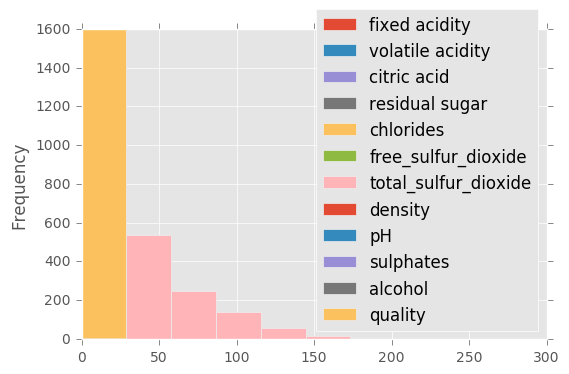

In [65]:
df.plot(kind='hist')  #not the best idea, why?

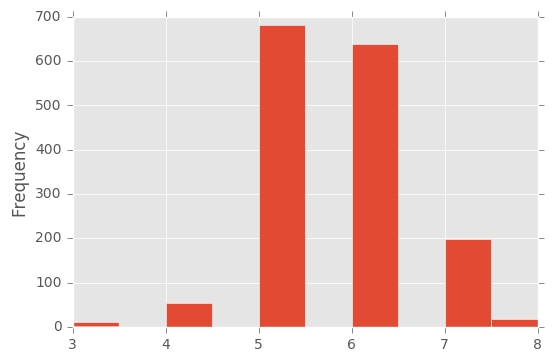

In [66]:
df['quality'].plot(kind='hist')

In [67]:
df.plot(kind='scatter')

ValueError: scatter requires and x and y column

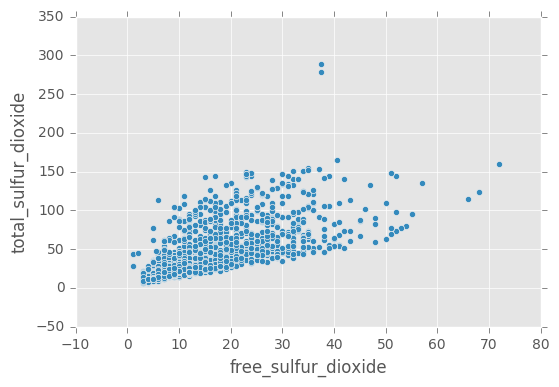

In [68]:
df.plot(kind='scatter', x='free_sulfur_dioxide', y='total_sulfur_dioxide')

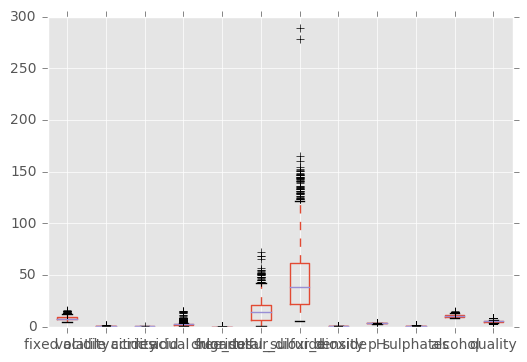

In [69]:
df.plot(kind='box')

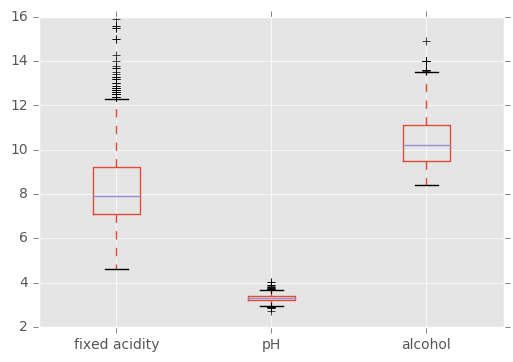

In [70]:
df[['fixed acidity', 'pH', 'alcohol']].plot(kind='box')

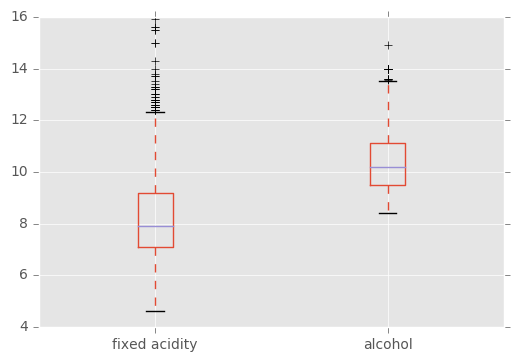

In [71]:
df[['fixed acidity', 'alcohol']].plot(kind='box')

One helpful account for learning matplotlib can be found [here](https://github.com/rougier/matplotlib-tutorial).  Additional notes from some of the material we have covered earlier in this class is also available [here](https://github.com/jrjohansson/scientific-python-lectures).